## 分类树

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# 实例化
# 训练集带入实例化的模型去进行训练，使用的接口是fit
# 使用其他接口将测试集导入我们训练好的模型，去获取我们希望过去的结果（score.Y_test）
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    wine.data, wine.target, test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rlf = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain, Ytrain)
rlf = rlf.fit(Xtrain, Ytrain)
score_c = clf.score(Xtest, Ytest)
score_r = rlf.score(Xtest, Ytest)

print(f'Single Tree:{score_c}', f'Random Forest:{score_r}')

Single Tree:0.8703703703703703 Random Forest:0.9444444444444444


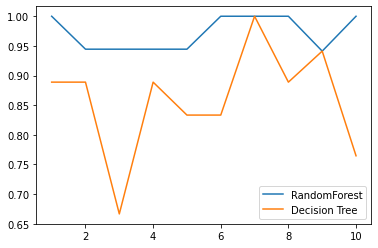

In [12]:
# 交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label='RandomForest')
plt.plot(range(1, 11), clf_s, label='Decision Tree')
plt.legend()
plt.show()

RandomForest:
0.9777777777777779
DecisionTree:
0.8705882352941178


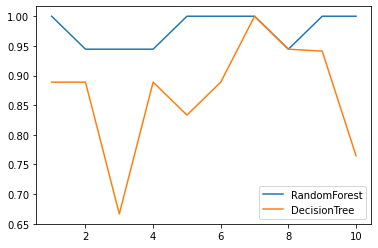

In [13]:
#====================一种更加有趣也更简单的写法===================#
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv=10)
    print("{}:".format(label)), print(score.mean())
    plt.plot(range(1, 11), score, label=label)
    plt.legend()
    label = "DecisionTree"

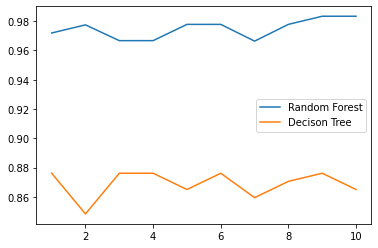

In [15]:
# 多组交叉训练对比
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_l.append(rfc_s)
    clf= DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv =10).mean()
    clf_l.append(clf_s)

plt.plot(range(1, 11), rfc_l, label = 'Random Forest')
plt.plot(range(1, 11), clf_l, label = 'Decison Tree')
plt.legend()
plt.show()

0.9888888888888889 19


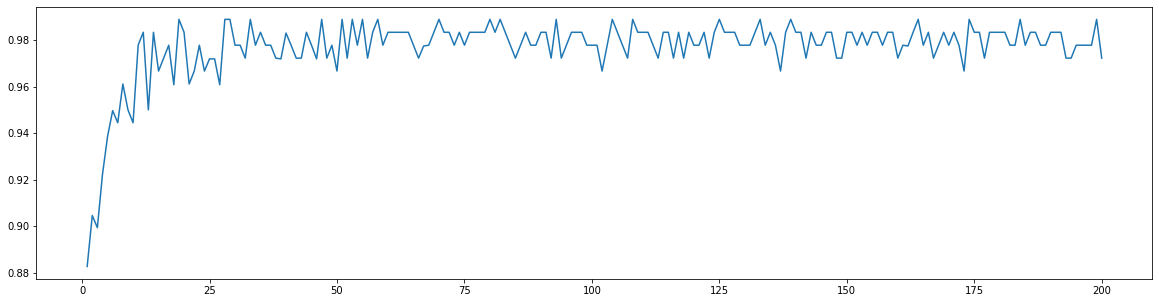

In [16]:
%%time
#####【TIME WARNING: about 2mins 30 seconds】#####
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)

print(max(superpa), superpa.index(max(superpa)) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), superpa)
plt.show()

In [18]:
# bagging装袋法为什么要比单棵树效果好
from scipy.special import comb
import numpy as np

np.array([comb(25, i) * (0.2 ** i) * ((1 - 0.2)**(25-i))
          for i in range(13, 26)]).sum()

0.00036904803455582827

In [22]:
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
#随机森林的重要属性之一：estimators_，查看森林中树的状况
print(rfc.estimators_)
print(rfc.estimators_[0])

for i in rfc.estimators_:
    print(i.random_state)

[DecisionTreeClassifier(max_features='auto', random_state=1872583848), DecisionTreeClassifier(max_features='auto', random_state=794921487), DecisionTreeClassifier(max_features='auto', random_state=111352301), DecisionTreeClassifier(max_features='auto', random_state=1853453896), DecisionTreeClassifier(max_features='auto', random_state=213298710), DecisionTreeClassifier(max_features='auto', random_state=1922988331), DecisionTreeClassifier(max_features='auto', random_state=1869695442), DecisionTreeClassifier(max_features='auto', random_state=2081981515), DecisionTreeClassifier(max_features='auto', random_state=1805465960), DecisionTreeClassifier(max_features='auto', random_state=1376693511), DecisionTreeClassifier(max_features='auto', random_state=1418777250), DecisionTreeClassifier(max_features='auto', random_state=663257521), DecisionTreeClassifier(max_features='auto', random_state=878959199), DecisionTreeClassifier(max_features='auto', random_state=854108747), DecisionTreeClassifier(ma

In [23]:
rfc.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [24]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25, oob_score=True) # 默认为Fasle
rfc = rfc.fit(wine.data, wine.target)

# 重要属性oob_score_
rfc.oob_score_

0.9606741573033708

In [25]:
# apply,fit,predict,socre,feature_importances_
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

0.9629629629629629

In [26]:
rfc.feature_importances_#结合zip可以对照特征名字查看特征重要性，参见上节决策树

array([0.15675149, 0.02388504, 0.01295668, 0.01991807, 0.02088496,
       0.07927624, 0.14611765, 0.01002739, 0.01144479, 0.10902417,
       0.06987767, 0.11512682, 0.22470905])

In [27]:
rfc.apply(Xtest)#apply返回每个测试样本所在的叶子节点的索引

array([[13, 16,  3, ...,  8, 14,  8],
       [12, 10,  1, ...,  4,  6,  5],
       [12, 17,  1, ...,  4,  6,  5],
       ...,
       [13, 19, 10, ..., 11, 14, 14],
       [ 3, 13,  5, ...,  8,  4,  8],
       [ 3, 15,  3, ...,  8,  4,  8]])

In [28]:
rfc.predict(Xtest)

array([1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 1, 1])

In [29]:
rfc.predict_proba(Xtest)

array([[0.4 , 0.6 , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.04, 0.  , 0.96],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.68, 0.28, 0.04],
       [0.  , 0.76, 0.24],
       [0.  , 1.  , 0.  ],
       [0.  , 0.88, 0.12],
       [0.6 , 0.36, 0.04],
       [0.12, 0.32, 0.56],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.32, 0.68],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.84, 0.16],
       [0.  , 0.96, 0.04],
       [0.  , 0.8 , 0.2 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [0.8 , 0.2 , 0.  ],
       [0.  , 0.  , 1.  ],
 

In [32]:
list(zip(rfc.predict(Xtest), rfc.predict_proba(Xtest)))

[(1, array([0.4, 0.6, 0. ])),
 (2, array([0. , 0.2, 0.8])),
 (2, array([0.04, 0.  , 0.96])),
 (1, array([0.04, 0.96, 0.  ])),
 (1, array([0., 1., 0.])),
 (0, array([0.88, 0.12, 0.  ])),
 (2, array([0.  , 0.16, 0.84])),
 (2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (1, array([0., 1., 0.])),
 (0, array([0.68, 0.28, 0.04])),
 (1, array([0.  , 0.76, 0.24])),
 (1, array([0., 1., 0.])),
 (1, array([0.  , 0.88, 0.12])),
 (0, array([0.6 , 0.36, 0.04])),
 (2, array([0.12, 0.32, 0.56])),
 (1, array([0., 1., 0.])),
 (2, array([0., 0., 1.])),
 (2, array([0.  , 0.32, 0.68])),
 (0, array([0.96, 0.04, 0.  ])),
 (1, array([0., 1., 0.])),
 (0, array([0.92, 0.08, 0.  ])),
 (2, array([0., 0., 1.])),
 (1, array([0.  , 0.84, 0.16])),
 (1, array([0.  , 0.96, 0.04])),
 (1, array([0. , 0.8, 0.2])),
 (1, array([0., 1., 0.])),
 (2, array([0., 0., 1.])),
 (0, array([1., 0., 0.])),
 (1, array([0.  , 0.92, 0.08])),
 (0, array([1., 0., 0.])),
 (0, array

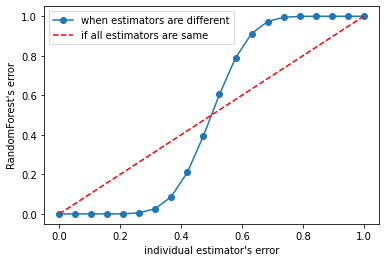

In [34]:
import numpy as np

x = np.linspace(0, 1, 20)
y = []
for epsilon in np.linspace(0, 1, 20):
    E = np.array([comb(25, i) * (epsilon ** i) * ((1 - epsilon) ** ( 25 - i)) for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, 'o-', label='when estimators are different')
plt.plot(x, x, '--', color='red', label='if all estimators are same')
plt.xlabel('individual estimator\'s error')
plt.ylabel('RandomForest\'s error')
plt.legend()
plt.show()

## 回归树

In [35]:
from sklearn.datasets import load_boston  # 一个标签是连续西变量的数据集
from sklearn.model_selection import cross_val_score  # 导入交叉验证模块
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归系

boston = load_boston()

In [36]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring='neg_mean_squared_error'  # 如果不写scoring，回归评估默认是R平方
                )

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [40]:
# sklearn当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())  # 这些指标是scoring可选择的参数

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']